In [1]:
import pandas as pd
import os
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics as metrics


In [2]:

PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "Sample_Size_1661.csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/Sample_Size_1661.csv'

In [3]:
#insert the data into a DataFrame

data = pd.read_csv(FINAL_DATA)

In [4]:
data.shape

(3322, 27)

In [5]:
data.head()

,HexagonNumber,HexandMonth,Month,Under20,20to29,30to39,40to49,50to59,60to69,70andabove,...,MiscCals,OverdoseCalls,PropertyCalls,QOLCalls,TrafficCalls,ViolentCalls,AverageTemperature,AverageHumidity,AveragePrecipitation,Unemployment
0,32,32-1,1,0,0,1,1,0,0,0,...,21,2,23,71,47,18,37.4075,0.541429,0.00025,0.071667
1,33,33-1,1,0,0,0,2,0,0,0,...,30,2,23,83,35,29,37.4075,0.541429,0.00025,0.255000
2,35,35-1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.139500
3,36,36-1,1,0,0,0,0,0,0,0,...,3,0,3,10,4,4,37.4075,0.541429,0.00025,0.192000
4,43,43-1,1,0,0,0,0,0,0,1,...,25,0,40,76,44,3,37.4075,0.541429,0.00025,0.078750


In [6]:
data.describe()

,HexagonNumber,Month,Under20,20to29,30to39,40to49,50to59,60to69,70andabove,TotalNarcan,...,MiscCals,OverdoseCalls,PropertyCalls,QOLCalls,TrafficCalls,ViolentCalls,AverageTemperature,AverageHumidity,AveragePrecipitation,Unemployment
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,368.743829,6.570138,0.045154,0.063817,0.145695,0.137869,0.299217,0.183022,0.037327,0.912101,...,17.806442,0.814570,11.678206,41.313666,22.822697,7.968092,64.448655,0.567246,0.002678,0.106817
std,196.305659,3.407581,0.224398,0.288529,0.410449,0.413873,0.640070,0.514389,0.200400,1.327486,...,35.570409,1.859712,14.849998,56.737941,30.282254,13.015783,14.909897,0.057652,0.002781,0.087368
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.407500,0.458571,0.000000,0.000000
25%,212.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,54.687857,0.531071,0.000250,0.035500
50%,350.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,6.000000,0.000000,7.000000,18.000000,11.000000,2.000000,63.496429,0.570714,0.001136,0.085750
75%,517.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,23.000000,1.000000,17.000000,60.000000,34.000000,11.000000,78.354286,0.586429,0.005382,0.165000
max,780.000000,12.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,3.000000,11.000000,...,448.000000,24.000000,122.000000,467.000000,247.000000,115.000000,84.563929,0.676786,0.007686,0.542000


In [7]:
data.groupby('NarcanAdministered').size()

NarcanAdministered
0    1661
1    1661
dtype: int64

In [8]:
#Create the test and train splits (80/20)
#load in the columns as features.  Deleted the HexagonNumber, ages, gender, weather and unemployment 
#because they were causing the model to be predictive and give us perfect scores 

features = data [[
   'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls'
]]

X = features

y = data['NarcanAdministered']

from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [9]:
X.shape

(3322, 9)

In [10]:
y.shape

(3322,)

In [11]:
f1_scores = []
names = []

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_name = 'DTC'
model.fit(X_train, y_train)

# Predict and report 
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)

f1_scores

             precision    recall  f1-score   support

          0       0.53      0.44      0.48       337
          1       0.51      0.60      0.55       328

avg / total       0.52      0.52      0.52       665



[0.55462184873949583]

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_name = 'RFC'
model.fit(X_train, y_train)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)



             precision    recall  f1-score   support

          0       0.48      0.50      0.49       335
          1       0.47      0.46      0.47       330

avg / total       0.48      0.48      0.48       665



In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'

# Create our first knn model form 
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)

             precision    recall  f1-score   support

          0       0.48      0.40      0.43       335
          1       0.48      0.56      0.52       330

avg / total       0.48      0.48      0.47       665



In [14]:
from sklearn.svm import SVC

model_name = 'SVC'
model = SVC() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)

             precision    recall  f1-score   support

          0       0.45      0.16      0.24       335
          1       0.48      0.80      0.60       330

avg / total       0.47      0.48      0.42       665



In [15]:
from sklearn.svm import LinearSVC

model_name = 'LSVC'

model = LinearSVC() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)

             precision    recall  f1-score   support

          0       0.50      0.96      0.66       335
          1       0.38      0.03      0.05       330

avg / total       0.44      0.49      0.36       665



In [16]:
from sklearn.naive_bayes import GaussianNB

model_name = 'GNB'

model = GaussianNB() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

f1_scores.append(metrics.f1_score(y_test, y_pred))
names.append(model_name)

             precision    recall  f1-score   support

          0       0.51      0.83      0.63       335
          1       0.54      0.21      0.30       330

avg / total       0.53      0.52      0.47       665



In [17]:
f1_scores

[0.4660493827160494,
 0.51603905160390506,
 0.60342857142857143,
 0.05084745762711864,
 0.30196936542669583]

In [66]:
names

['DTC', 'RFC', 'KNN', 'SVC', 'LSVC', 'GNB']

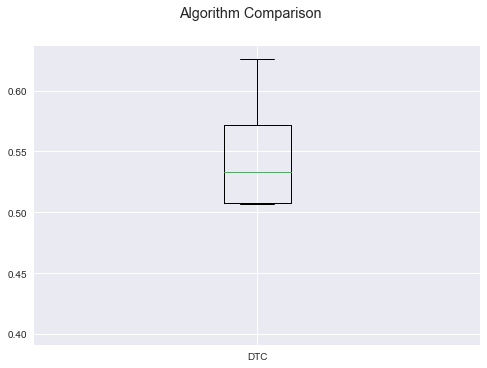

In [67]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(f1_scores)
ax.set_xticklabels(names)
plt.show()

In [68]:
import seaborn as sns



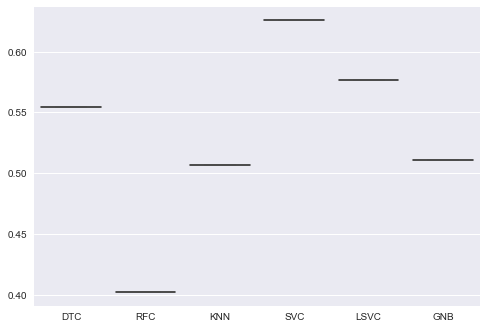

In [69]:
ax = sns.boxplot(x=names, y=f1_scores)
plt.show()

# Make Predictions

In [70]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.518796992481
[[150 187]
 [133 195]]
             precision    recall  f1-score   support

          0       0.53      0.45      0.48       337
          1       0.51      0.59      0.55       328

avg / total       0.52      0.52      0.52       665

